In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
visualization_data = pd.read_csv('Student_Mental_Health_V1.csv')
visualization_data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,Male,21,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,Male,19,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,Female,22,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0


In [28]:
value_plot = visualization_data.groupby('What is your CGPA?')[['Do you have Depression?','Do you have Anxiety?','Do you have Panic attack?']].sum().reset_index()
value_plot

,What is your CGPA?,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?
0,0 - 1.99,0,0,1
1,2.00 - 2.49,0,0,1
2,2.50 - 2.99,3,1,3
3,3.00 - 3.49,19,15,9
4,3.50 - 4.00,12,18,18
5,3.50 - 4.00,1,0,1


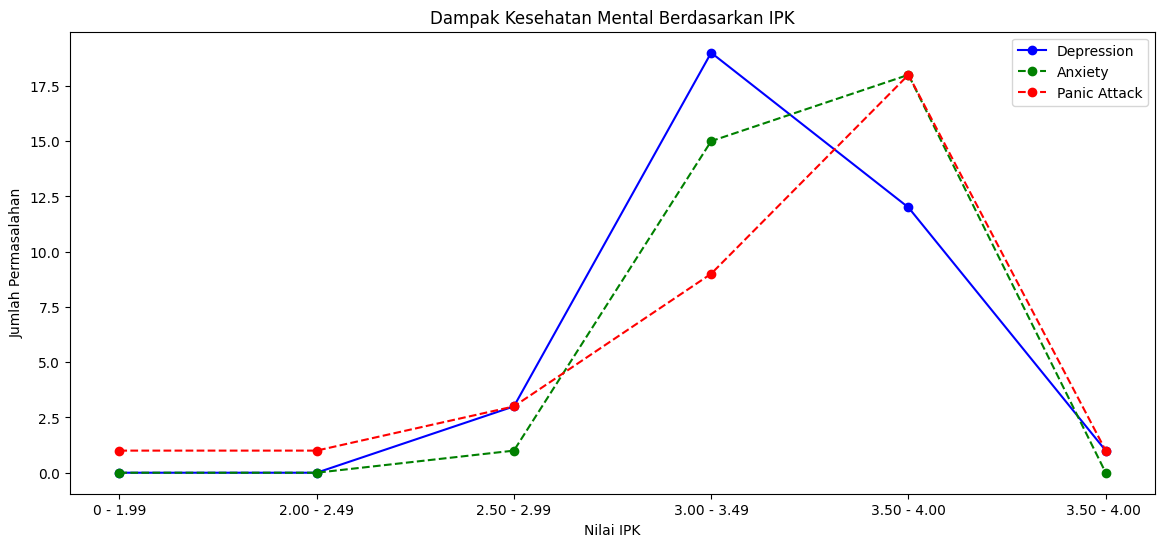

In [29]:
cgpa = value_plot['What is your CGPA?'].tolist()
depression = value_plot['Do you have Depression?'].tolist()
anxiety = value_plot['Do you have Anxiety?'].tolist()
panic_attack = value_plot['Do you have Panic attack?'].tolist()

plt.figure(figsize=(14, 6))
plt.plot(cgpa, depression, marker='o', label='Depression', color='b',)
plt.plot(cgpa, anxiety, marker='o', label='Anxiety', color='g', linestyle='--')
plt.plot(cgpa, panic_attack, marker='o', label='Panic Attack', color='r', linestyle='--')
plt.title('Dampak Kesehatan Mental Berdasarkan IPK')
plt.xlabel('Nilai IPK')
plt.ylabel('Jumlah Permasalahan')
plt.legend()
plt.show()

In [30]:
age_plot = visualization_data.groupby('Age')[['Do you have Depression?','Do you have Anxiety?','Do you have Panic attack?']].sum().reset_index()
age_plot

,Age,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?
0,18,11,14,9
1,19,9,5,9
2,20,3,3,1
3,21,0,2,0
4,22,1,0,0
5,23,5,2,5
6,24,6,8,9


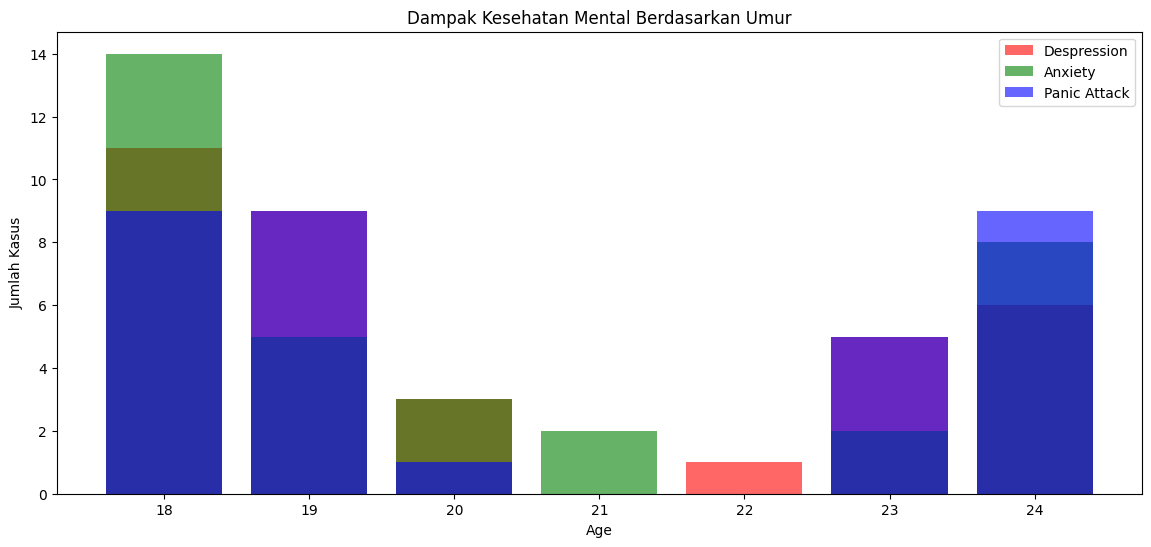

In [31]:
plt.figure(figsize=(14,6))
plt.bar(age_plot['Age'], age_plot['Do you have Depression?'], label='Despression', color='r', alpha=0.6)
plt.bar(age_plot['Age'], age_plot['Do you have Anxiety?'], label='Anxiety', color='g', alpha=0.6)
plt.bar(age_plot['Age'], age_plot['Do you have Panic attack?'], label='Panic Attack', color='b', alpha=0.6)
plt.title('Dampak Kesehatan Mental Berdasarkan Umur')
plt.xlabel('Age')
plt.ylabel('Jumlah Kasus')
plt.legend()
plt.show()

In [32]:
gender_plot = visualization_data.groupby('Choose your gender')[['Do you have Depression?','Do you have Anxiety?','Do you have Panic attack?']].sum().reset_index()
gender_plot

,Choose your gender,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?
0,Female,29,24,25
1,Male,6,10,8


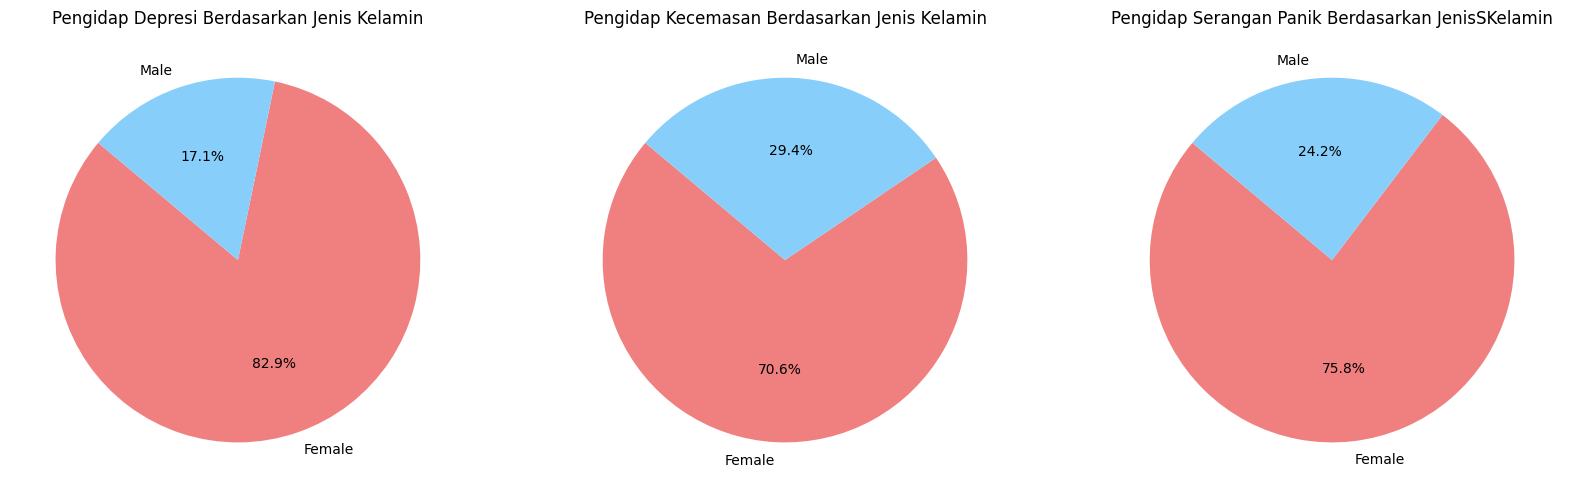

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].pie(gender_plot['Do you have Depression?'], labels=gender_plot['Choose your gender'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
axs[0].set_title('Pengidap Depresi Berdasarkan Jenis Kelamin')
axs[1].pie(gender_plot['Do you have Anxiety?'], labels=gender_plot['Choose your gender'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
axs[1].set_title('Pengidap Kecemasan Berdasarkan Jenis Kelamin')
axs[2].pie(gender_plot['Do you have Panic attack?'], labels=gender_plot['Choose your gender'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
axs[2].set_title('Pengidap Serangan Panik Berdasarkan JenisSKelamin')
plt.show()